In [98]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Below codes are composed with first cell the answer of problem is in and second cell printng out the results of first cell.

# 1

In [212]:
np.random.seed(1234)

In [211]:
#print(np.random.rand(5))

[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]


# 2

In [213]:
data = np.random.normal(loc = 50, scale=3, size=(10,2))

In [214]:
print(data)

[[51.41430549 46.42707292]
 [54.29812091 49.06204431]
 [47.8382338  52.66148882]
 [52.57876524 48.09042949]
 [50.04708912 43.27194514]
 [53.45010717 52.97583807]
 [52.85997238 43.93623554]
 [48.9977679  50.00635509]
 [51.21636023 50.86727582]
 [53.96347458 45.35928334]]


# 3

In [215]:
avgs = np.mean(data,axis=0)

In [216]:
print(avgs)

[51.66641968 48.26579685]


# 4

In [217]:
stds = np.std(data, axis = 0, ddof = 1)

In [218]:
print(stds)

[2.1680983  3.45576778]


# 5

In [219]:
ses = stds/np.sqrt(data.shape[0])

In [220]:
print(ses)

[0.68561288 1.09280972]


In [221]:
print(data.shape[0])

10


# 6

In [222]:
np.all([data > avgs -ses, data < avgs +ses], axis=0)

array([[ True, False],
       [False,  True],
       [False, False],
       [False,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [ True, False],
       [False, False]])

In [223]:
for i in range(data.shape[1]):
    print(data[:,i])
    print(avgs[i] -ses[i], avgs[i], avgs[i] +ses[i])

[51.41430549 54.29812091 47.8382338  52.57876524 50.04708912 53.45010717
 52.85997238 48.9977679  51.21636023 53.96347458]
50.98080680123874 51.66641968260475 52.35203256397075
[46.42707292 49.06204431 52.66148882 48.09042949 43.27194514 52.97583807
 43.93623554 50.00635509 50.86727582 45.35928334]
47.17298712991034 48.26579685364664 49.35860657738294


# 7

In [224]:
np.all([data > avgs -stds, data < avgs +stds], axis=0)

array([[ True,  True],
       [False,  True],
       [False, False],
       [ True,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True,  True],
       [False,  True]])

In [225]:
for i in range(data.shape[1]):
    print(data[:,i])
    print(avgs[i] -stds[i], avgs[i] ,avgs[i] +stds[i])

[51.41430549 54.29812091 47.8382338  52.57876524 50.04708912 53.45010717
 52.85997238 48.9977679  51.21636023 53.96347458]
49.49832138433736 51.66641968260475 53.834517980872135
[46.42707292 49.06204431 52.66148882 48.09042949 43.27194514 52.97583807
 43.93623554 50.00635509 50.86727582 45.35928334]
44.81002907746055 48.26579685364664 51.721564629832734


# 8

I think it is hard to say that the emission line width has significantly changed, because all the measurements values are in the the confidence interval of 99% confidence level. According to central limit theorem, normal distribution happens when we do some trials which have independent probability each trial with large tiral number.This means if there are any some errors that happens some probability independent of the emission line width and the measurements valuses differences can come from something independent of the emssion line width. So if I have to write a search paper results, I will conclude that there is no evident that shows emission line width of AGN has been changed during 10 years.

In [226]:
np.all([data > avgs -2.58*stds, data < avgs + 2.58*stds], axis=0)

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

# 9

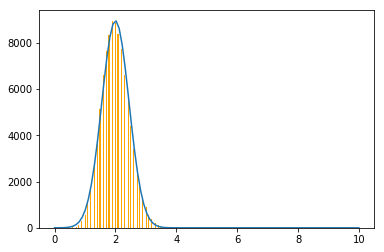

In [227]:
np.random.seed(1234)

def gauss(x, mu, sigma):
    return np.exp(-(x - mu)**2/(2*sigma**2))

# For Poisson distribution, variance = mean = std**2
mean = 2
variance = 2
n_sample = 10

data_pois = np.random.poisson(lam=mean, size=(n_sample, 100000))
avgs_pois = np.mean(data_pois, axis=0)

h = plt.hist(avgs_pois, bins=100,color='orange')
x = np.linspace(0, 10, 100)

expected_mu = mean
expected_sigma = np.sqrt(variance)/np.sqrt(n_sample)
plt.plot(x, h[0].max()*gauss(x, 2, np.sqrt(2/n_sample)))
plt.show()

# 10

In [231]:
np.random.seed(12354)

true_mu = 50
true_sigma = 3
n_sample = 10

data_ci = np.random.normal(loc=true_mu, scale=true_sigma, size=(n_sample, 100000))

avgs_ci = data_ci.mean(axis=0)  # Hint: must have length 100000
stds_ci = data_ci.std(axis=0, ddof=1)
ses_ci = stds_ci / np.sqrt(data_ci.shape[0])

hit = ((true_mu > avgs_ci - ses_ci) 
       & (true_mu < avgs_ci + ses_ci))  # Hint: one of & and |
print(100 * np.count_nonzero(hit)/np.shape(hit)[0], "%")

65.525 %
